# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
learning_rate = 0.01
training_steps = 1000

In [3]:
X = np.random.randn(50)
Y = 2*X + np.random.randn(50)

In [20]:
W = tf.Variable(np.random.randn(), name = 'weight')
b = tf.Variable(np.random.randn(), name = 'bias')

def linear_regression(x):
    return W * x + b

# loss-function으로 mse사용
def mean_square(y_pred, y_ture):
    return tf.reduce_mean(tf.square(y_pred - y_ture))

optimizer = tf.optimizers.SGD(learning_rate)

In [21]:
# optimizer 수행 함수
def run_optimization():
    with tf.GradientTape() as tape:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    gradients = tape.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [22]:
for step in range(1, training_steps + 1):
    run_optimization()
    
    if step % 50 == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print('step: {:4d}\tloss: {:.4f}\tW: {:.4f}\tb: {:.4f}'.format(step, loss, W.numpy(), b.numpy()))

step:   50	loss: 1.1988	W: 1.6606	b: 0.4303
step:  100	loss: 0.9865	W: 1.9014	b: 0.2317
step:  150	loss: 0.9626	W: 1.9725	b: 0.1545
step:  200	loss: 0.9598	W: 1.9939	b: 0.1248
step:  250	loss: 0.9594	W: 2.0005	b: 0.1136
step:  300	loss: 0.9593	W: 2.0025	b: 0.1094
step:  350	loss: 0.9593	W: 2.0032	b: 0.1078
step:  400	loss: 0.9593	W: 2.0034	b: 0.1072
step:  450	loss: 0.9593	W: 2.0035	b: 0.1070
step:  500	loss: 0.9593	W: 2.0035	b: 0.1069
step:  550	loss: 0.9593	W: 2.0035	b: 0.1069
step:  600	loss: 0.9593	W: 2.0035	b: 0.1068
step:  650	loss: 0.9593	W: 2.0035	b: 0.1068
step:  700	loss: 0.9593	W: 2.0035	b: 0.1068
step:  750	loss: 0.9593	W: 2.0035	b: 0.1068
step:  800	loss: 0.9593	W: 2.0035	b: 0.1068
step:  850	loss: 0.9593	W: 2.0035	b: 0.1068
step:  900	loss: 0.9593	W: 2.0035	b: 0.1068
step:  950	loss: 0.9593	W: 2.0035	b: 0.1068
step: 1000	loss: 0.9593	W: 2.0035	b: 0.1068


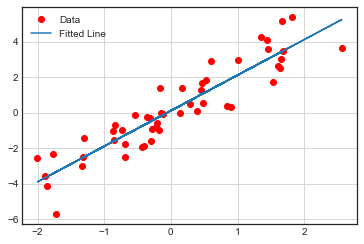

In [23]:
plt.plot(X, Y, 'ro', label = 'Data')
plt.plot(X, np.array(W * X + b), label = 'Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [24]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [25]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [45]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [46]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

0.3820293
-0.5570555
3.2120836


### 데이터 지정

In [47]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

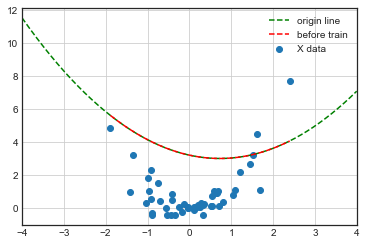

In [48]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label = 'X data')
plt.plot(x_, y_, 'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--', label = 'before train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

### Util Functions

In [49]:
def compute_loss():
    pred_y = a*(np.array(X)**2) + b*np.array(X) + c
    loss = tf.reduce_mean((Y - pred_y)**2)
    return loss

### Optimizer

In [50]:
optimizer = Adam(learning_rate = learning_rate)

### 학습

In [51]:
for epoch in range(1, epochs+1, 1):
    optimizer.minimize(compute_loss, var_list = [a, b, c])
    
    if epoch % 100 == 0:
        print('epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}'.format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:  100	a: 1.0004	b: 0.1264	c: 0.4175
epoch:  200	a: 1.2411	b: 0.0591	c: -0.0687
epoch:  300	a: 1.2457	b: 0.0579	c: -0.0779
epoch:  400	a: 1.2456	b: 0.0579	c: -0.0779
epoch:  500	a: 1.2456	b: 0.0579	c: -0.0779
epoch:  600	a: 1.2456	b: 0.0579	c: -0.0779
epoch:  700	a: 1.2456	b: 0.0579	c: -0.0779
epoch:  800	a: 1.2456	b: 0.0579	c: -0.0779
epoch:  900	a: 1.2456	b: 0.0579	c: -0.0779
epoch: 1000	a: 1.2456	b: 0.0579	c: -0.0779


### 학습 후의 회귀선

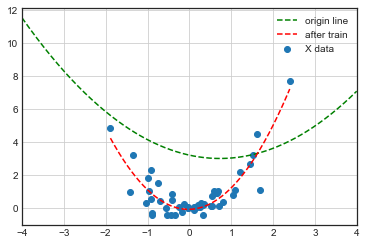

In [52]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

plt.scatter(X, Y, label = 'X data')
plt.plot(x_, y_, 'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--', label = 'after train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [53]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [54]:
num_classes = 10
num_features = 28 * 28

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten 형태로 바꿔주자 >> flat하게 펼쳐주자 == 2D -> 1D로 변환
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalization
x_train, x_test = x_train / 255., x_test / 256.

### tf.data API 사용

In [57]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

## 데이터 형태를 shuffle > batch > 구성

### 변수 지정

In [58]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name = 'weight')
b = tf.Variable(tf.zeros([num_classes]), name = 'biase')

### Util Functions

In [78]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
    true_y = tf.one_hot(true_y, depth = num_classes)
    pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)
    
    return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [79]:
optimizer = tf.optimizers.SGD(learning_rate)

In [80]:
def run_optimization(x, y):
    with tf.GradientTape() as tape:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
        
    gradients = tape.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [82]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % 50 == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print('step: {:4d}\tloss: {:.4f}\taccuracy: {:.4f}'.format(step, loss, acc))

step:   50	loss: 0.9257	accuracy: 0.8047
step:  100	loss: 1.0648	accuracy: 0.7656
step:  150	loss: 0.6747	accuracy: 0.8516
step:  200	loss: 0.8002	accuracy: 0.8164
step:  250	loss: 0.7812	accuracy: 0.8555
step:  300	loss: 0.7974	accuracy: 0.8281
step:  350	loss: 0.8784	accuracy: 0.8164
step:  400	loss: 0.7839	accuracy: 0.8203
step:  450	loss: 0.5350	accuracy: 0.8711
step:  500	loss: 0.5185	accuracy: 0.8672
step:  550	loss: 0.6686	accuracy: 0.8398
step:  600	loss: 1.0161	accuracy: 0.8008
step:  650	loss: 0.6596	accuracy: 0.8398
step:  700	loss: 0.5454	accuracy: 0.8672
step:  750	loss: 0.8273	accuracy: 0.8672
step:  800	loss: 0.6353	accuracy: 0.8359
step:  850	loss: 0.7646	accuracy: 0.8438
step:  900	loss: 0.5063	accuracy: 0.8789
step:  950	loss: 0.8075	accuracy: 0.7969
step: 1000	loss: 0.9674	accuracy: 0.8516


###  테스트

In [84]:
pred = logistic_regression(x_test)
print('Test Accuracy: {}'.format(accuracy(pred, y_test)))

Test Accuracy: 0.8465999960899353


###  시각화

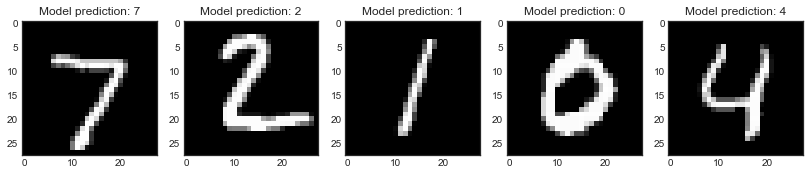

In [85]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize = (14, 8))
for i in range(1, num_images + 1, 1):
    plt.subplot(1, num_images, i)
    # 2차원형태로 다시 reshape
    plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap = 'gray')
    plt.title('Model prediction: {}'.format(np.argmax(predictions.numpy()[i-1])))
    
plt.show()